### Computations and plots for project in TMA4180 Optimization 1 

Import necessary functions

In [1]:
from project_definitions import *

### Part 1 - Cable networks with external nodes
Methods:
- gradient descent with constant stepsize, armijo condition and strong/weak wolfe conditions. 
- BFGS with strong wolfe condition

Constraint:
- fixed nodes 

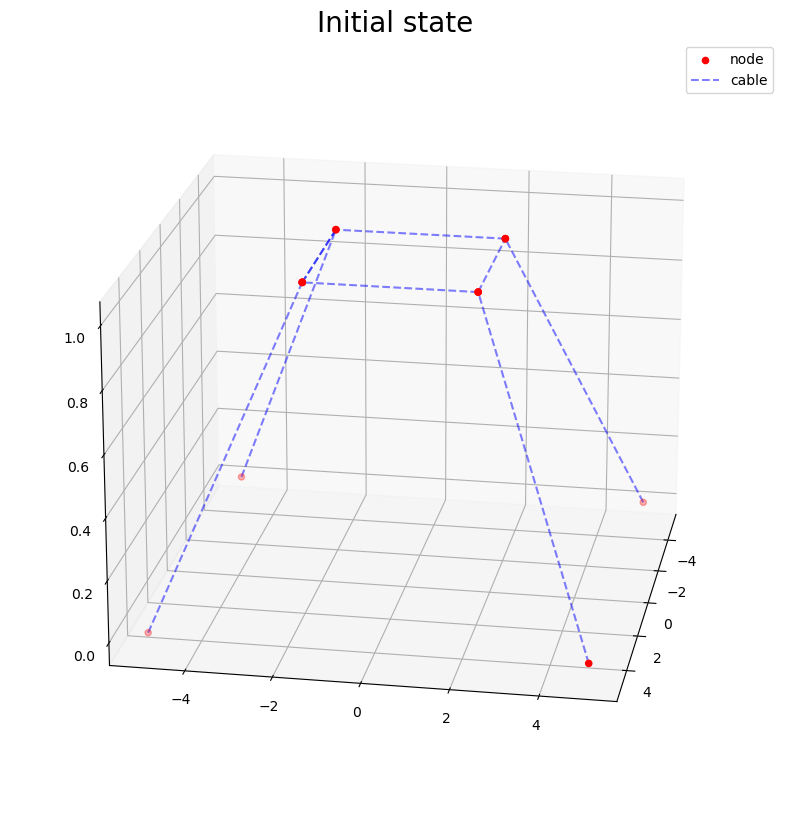

In [2]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
X[:,0] = [5,5,0]
X[:,1] = [-5,5,0]
X[:,2] = [-5,-5,0]
X[:,3] = [5,-5,0]
X[:,4] = [2,2,1]
X[:,5] = [-2,2,1]
X[:,6] = [-2,-2, 1]
X[:,7] = [2,-2, 1]

mg = 1/6
pg = 0
k = 3 
c = 0

edges = np.array([[1,5], [5,6], [4,5], [2,6], [6,7], [3,7], [4,7], [0,4]])
create_edge(A, edges, 1)
B = np.zeros_like(A)
L = 3*np.ones_like(A)
fixed_points = [0,1,2,3]

plt.figure(figsize=(10,10))
ax0 = plt.axes(projection = '3d')
plot_cable_net(X, A, ax0)
ax0.view_init(20,10)
ax0.set_title(f'Initial state', fontsize = 20)
plt.legend()
np.set_printoptions(precision = 5)

plt.savefig('inital_state_cable_net.png')

Gradient descent with strong wolfe condition

number of gradient descent steps = 133, number of step size optimization = 338, norm of gradient = 9.41521748362786e-09, Energy = 1.1666666666666667
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


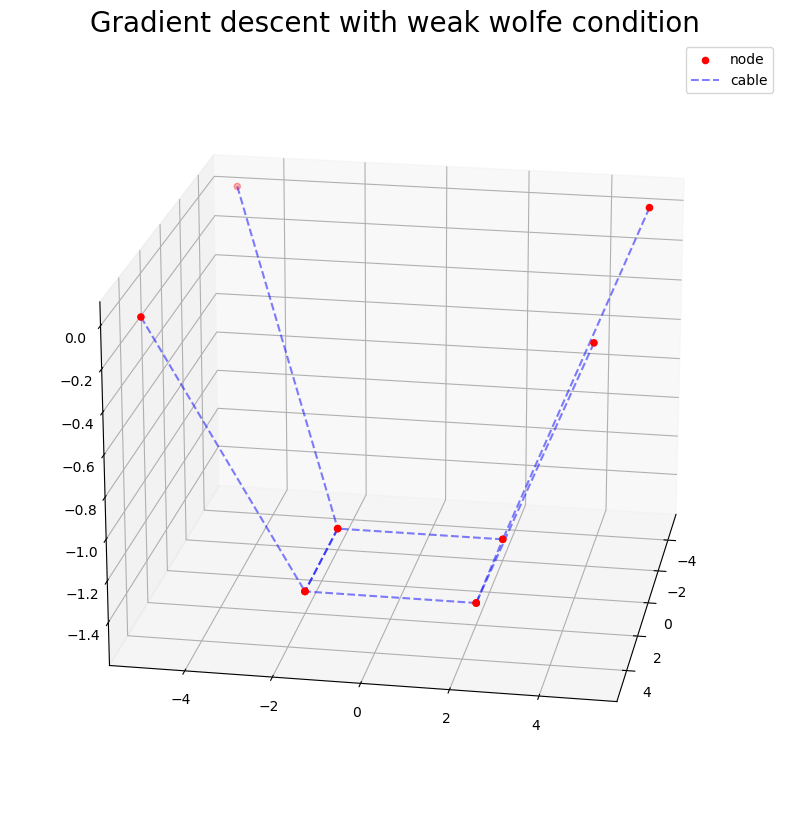

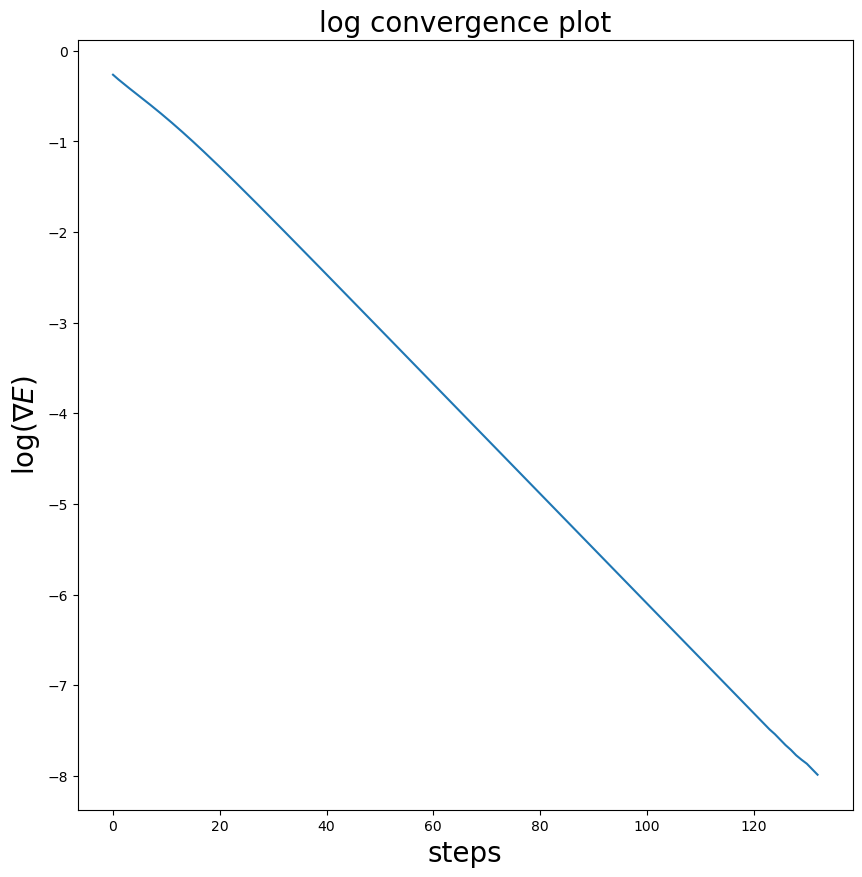

In [3]:

plt.figure(figsize=(10,10))
ax3 = plt.axes(projection = '3d')
X_weak_wolfe, error_weak_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-8, weak_w = True, alpha_0 = 10)
plot_cable_net(X_weak_wolfe, A, ax3)
ax3.view_init(20,10)
ax3.set_title(f'Gradient descent with weak wolfe condition', fontsize = 20)
plt.savefig('GD_strong_wolfe_cable_net.png')
plt.legend()
print(X_weak_wolfe)

index = range(len(error_weak_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_weak_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_GD_weak_wolfe_net.png')

BFGS 

number of BFGS steps = 7, number of step size optimization = 6, norm of gradient = 9.78947129508623e-11, Energy = 1.1666666666666679
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


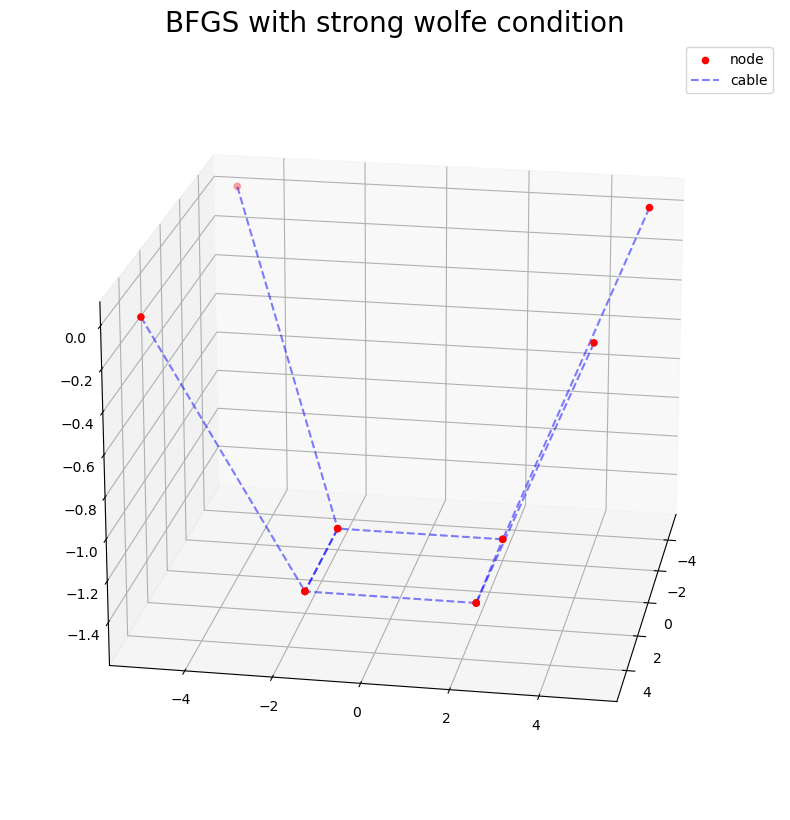

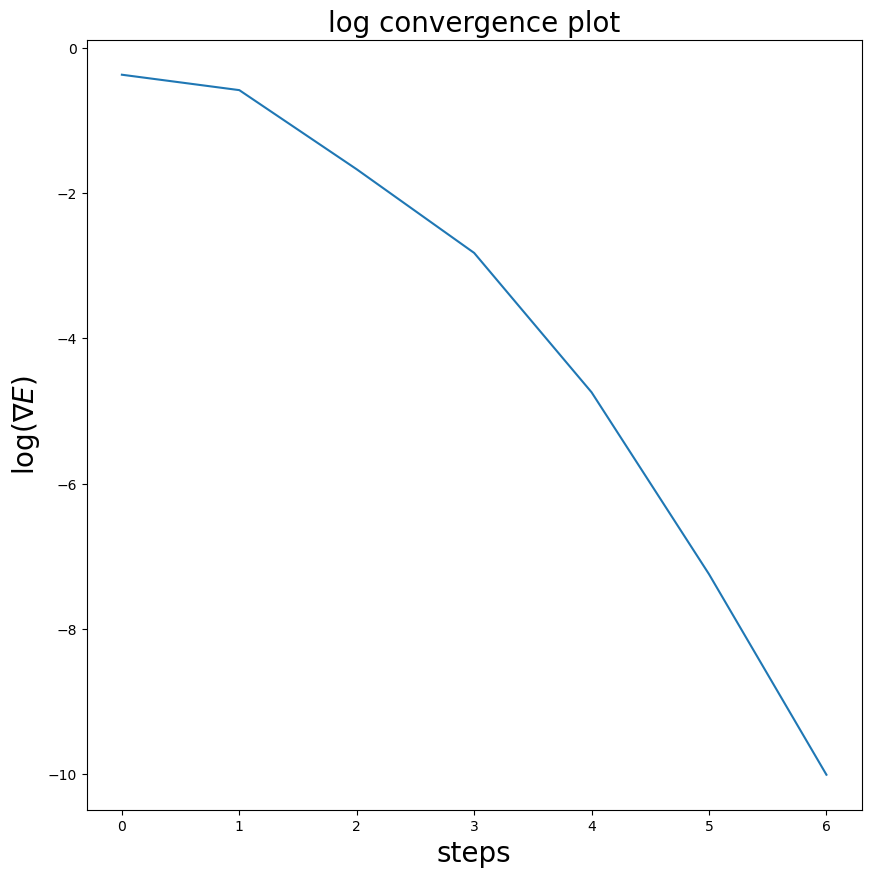

In [4]:

plt.figure(figsize=(10,10))
ax4 = plt.axes(projection = '3d')
X_BFGS, error_BFGS_alt_strong_wolfe= BFGS(E,gradient_E, np.copy(X), A, B, L, fixed_points, mg , pg, k, c , tol = 1e-10, strong_w = True)
plot_cable_net(X_BFGS, A, ax4)
ax4.view_init(20,10)
ax4.set_title(f'BFGS with strong wolfe condition', fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_cable_net.png')
plt.legend()
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_net.png')

### Part 2 network with cables, bars and external nodes
Methods:
- gradient descent with constant stepsize, armijo condition and strong/weak wolfe conditions. 
- BFGS with strong wolfe condition

Constraint:
- Fixed nodes

In [5]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)


Set all weight equal to zero, $k = 0.1$ and $c=1$

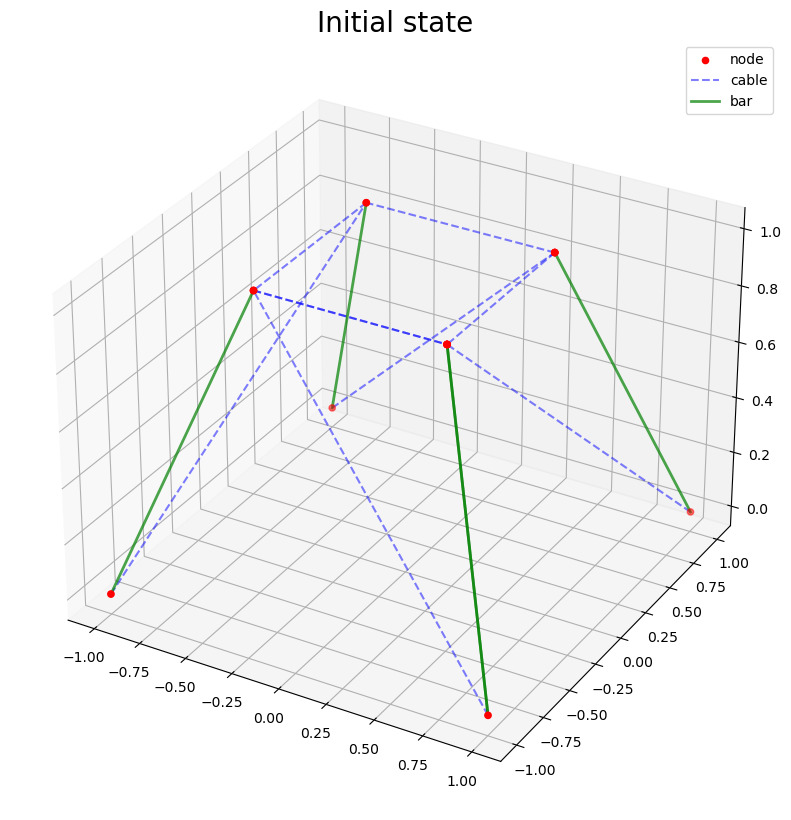

In [6]:
mg, pg, k, c = 0, 0, 0.1, 1
mu = 0

plt.figure(figsize=(10,10))
ax0 = plt.axes(projection = '3d')
plot_cable_net(X,A,ax0)
plot_bar_net(X,B,ax0)
ax0.set_title(f'Initial state', fontsize = 20)
plt.legend()
plt.savefig('initial_state_tensegrity_dome.png')


Gradient descent with strong wolfe condtion

number of gradient descent steps = 1000, number of step size optimization = 3496, norm of gradient = 2.0347760792718545e-08, Energy = 0.009285570216405921
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09710e-01
   1.02561e-05  7.09710e-01 -1.02561e-05]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00 -1.02561e-05
  -7.09710e-01  1.02561e-05  7.09710e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


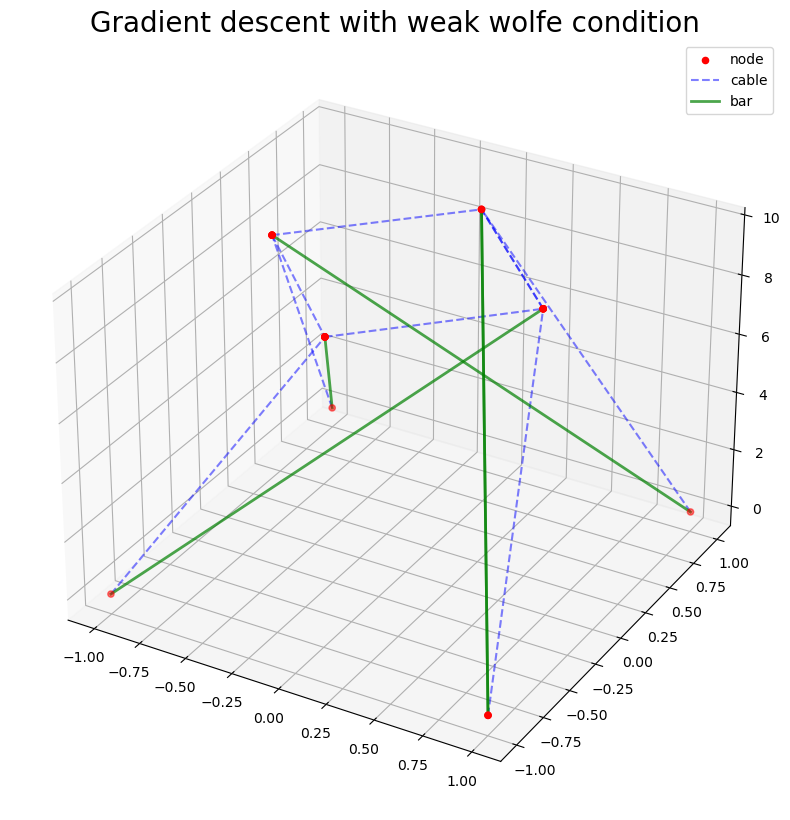

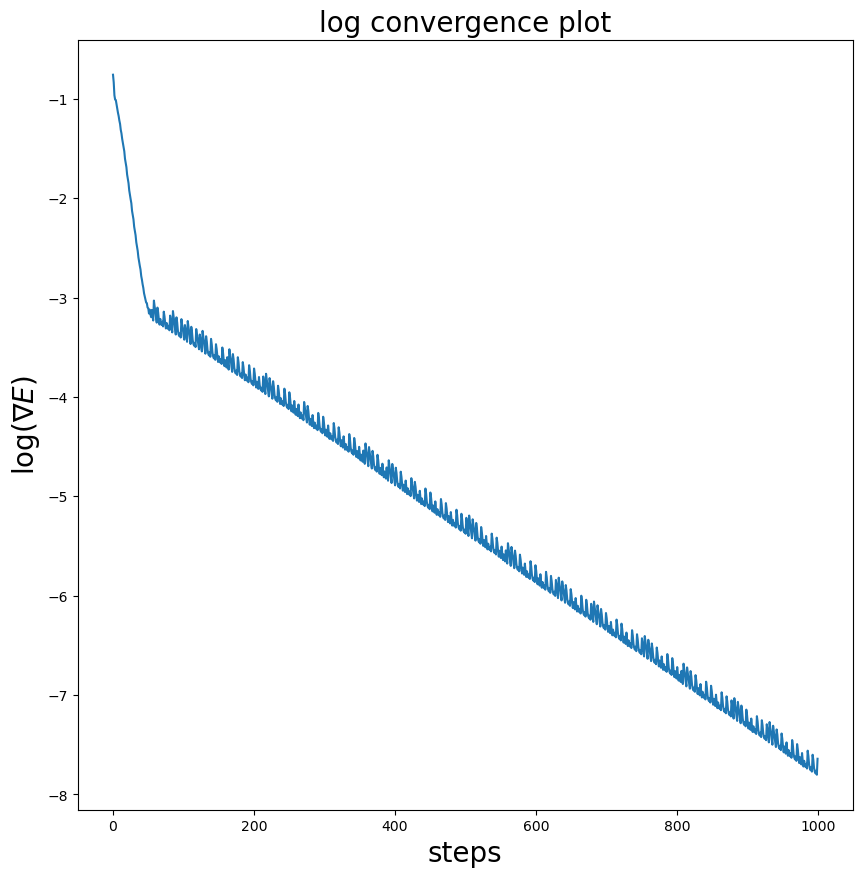

In [7]:
X_strong_wolfe, error_strong_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, weak_w = True)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')

plot_cable_net(X_strong_wolfe, A, ax1)
plot_bar_net(X_strong_wolfe, B, ax1)
ax1.set_title(f'Gradient descent with weak wolfe condition', fontsize = 20)
plt.legend()
plt.savefig('GD_strong_wolfe_tensegrity_dome.png')
print(X_strong_wolfe)

index = range(len(error_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)

plt.savefig('log_convergence_GD_weak_wolfe_tensegrity_dome.png')

number of BFGS steps = 38, number of step size optimization = 44, norm of gradient = 7.334538314587983e-14, Energy = 0.009285570216250965
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09710e-01
   3.32767e-12  7.09710e-01 -3.32854e-12]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00 -3.32860e-12
  -7.09710e-01  3.33028e-12  7.09710e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


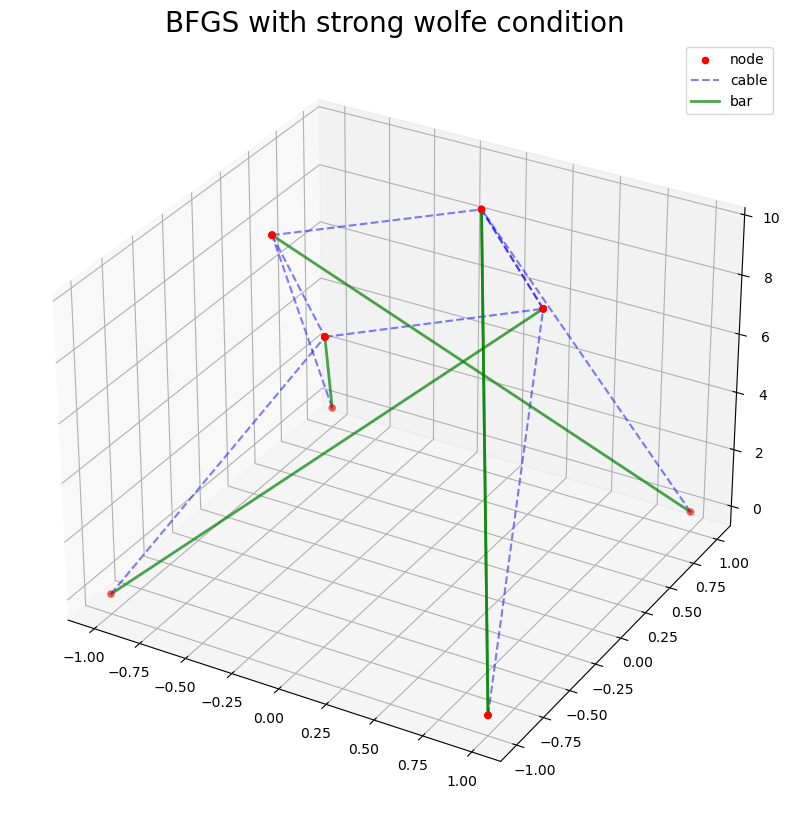

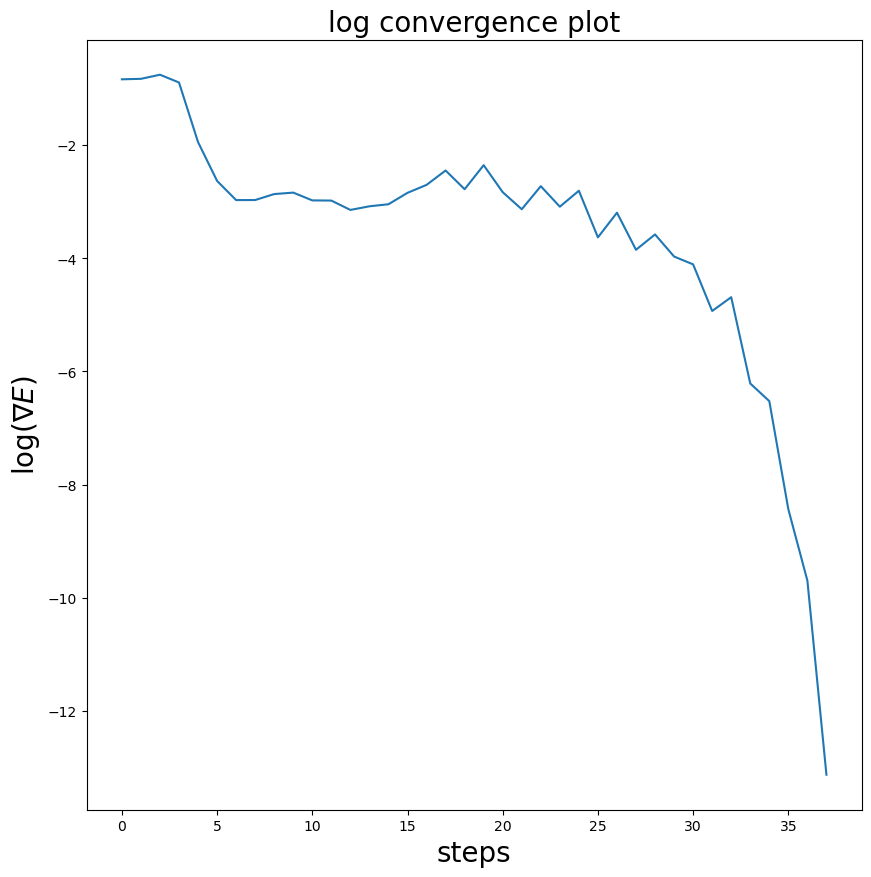

In [8]:
mg, pg, k, c = 0, 0, 0.1,1
X_BFGS, error_BFGS_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-12, strong_w= True)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')

plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition', fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_tensegrity_dome.png')
plt.legend()
print(X_BFGS)

index = range(len(error_BFGS_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome.png')

Change of parameters. Give weight to external loads and bars. Stiffen material parameters

number of BFGS steps = 25, number of step size optimization = 25, norm of gradient = 4.5280446752004406e-11, Energy = 0.032113679772899036


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 1.      -1.      -1.       1.      -0.70585  0.07843  0.70585 -0.07843]
 [ 1.       1.      -1.      -1.      -0.07843 -0.70585  0.07843  0.70585]
 [ 0.       0.       0.       0.       9.48087  9.48087  9.48087  9.48087]]


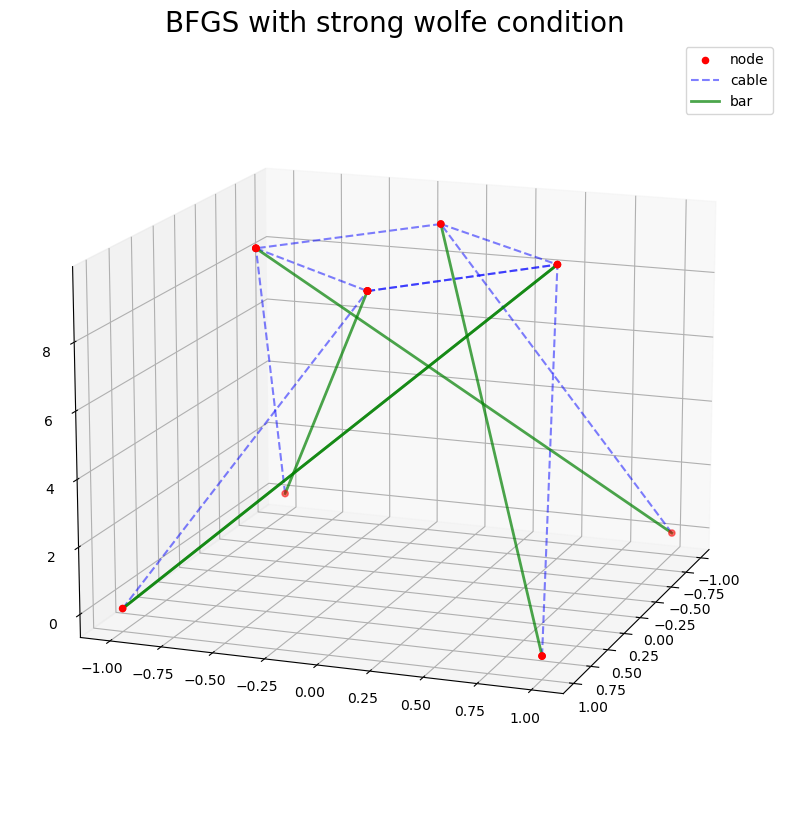

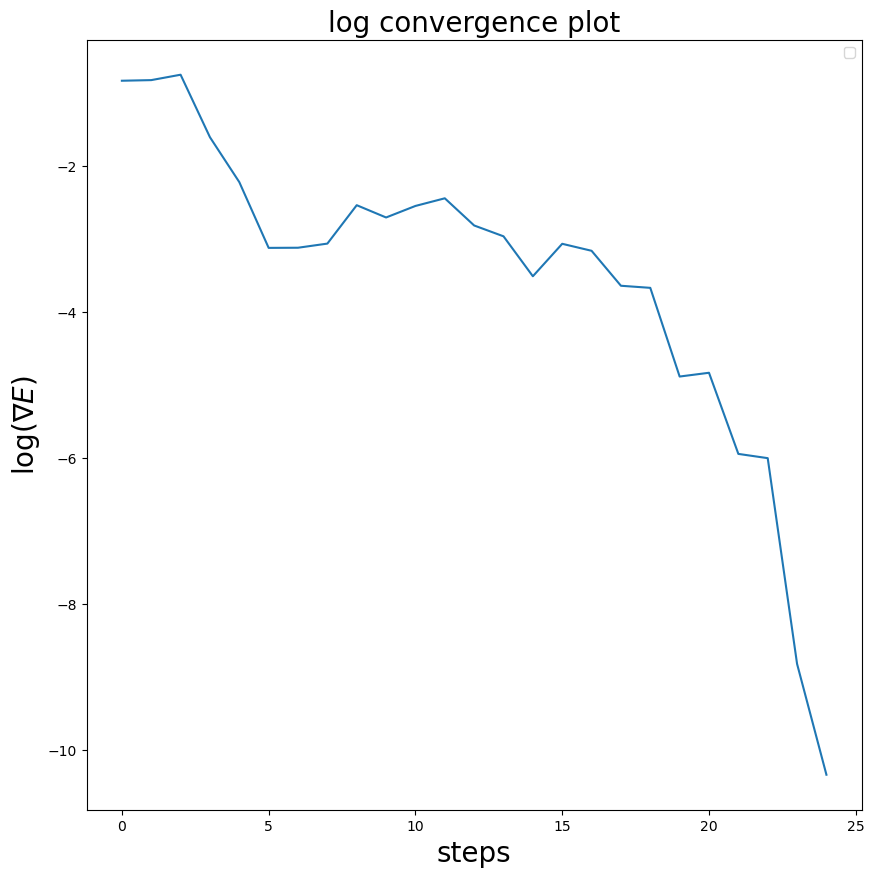

In [9]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  

cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]])
cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)

mg, pg, k, c = 1e-4, 1e-4, 0.1, 1
fixed_points = [0,1,2,3]
X_BFGS, error_BFGS_alt_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, strong_w= True, tol = 1e-10)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition' , fontsize = 20)
ax1.view_init(15,20)
plt.legend()
plt.savefig('BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.legend()
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')

number of BFGS steps = 14, number of step size optimization = 418, norm of gradient = 5.332106284283711e-16, Energy = 0.020732683245116353


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 1.      -1.      -1.       1.       0.     ]
 [ 1.       1.      -1.      -1.       0.     ]
 [ 0.       0.       0.       0.       9.84591]]


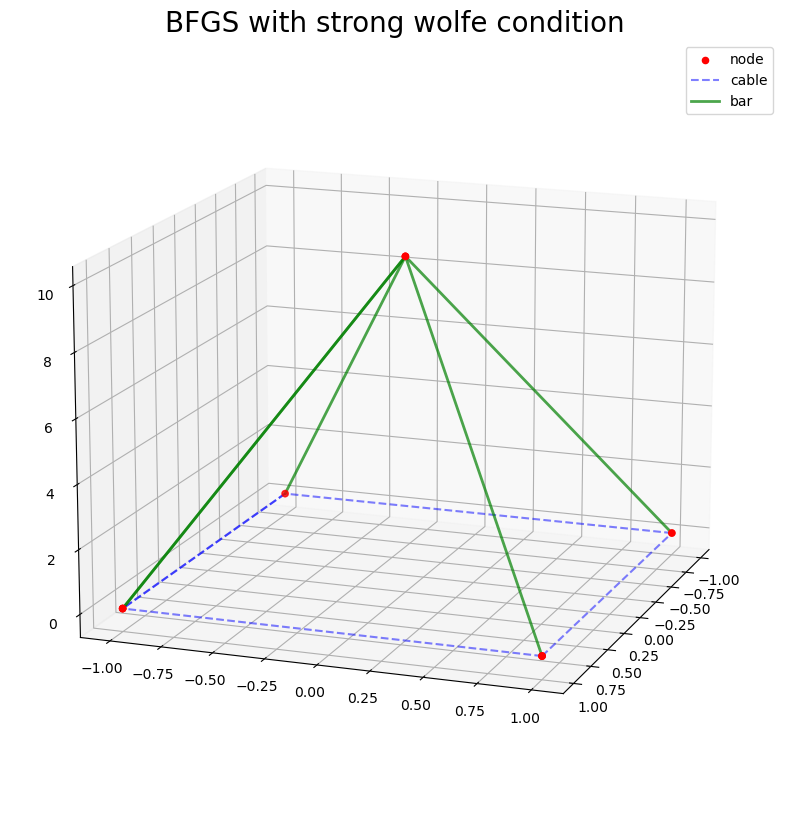

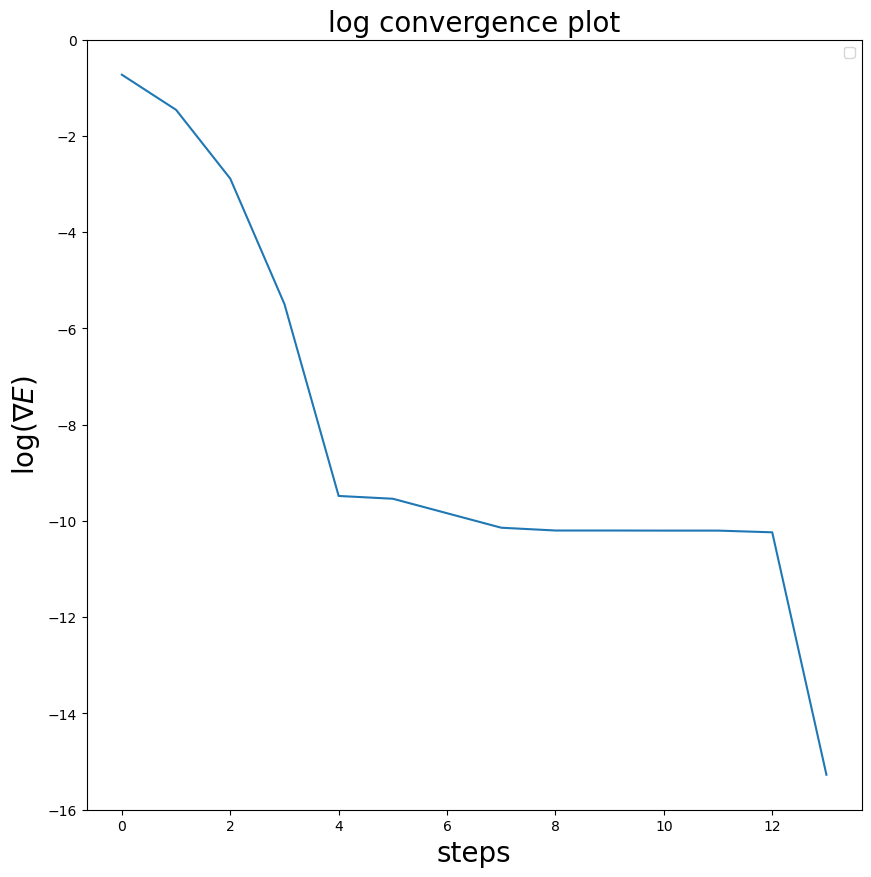

In [10]:
N = 5
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [0,0, 4]

cable_edges = np.array([[0,1], [1,2], [2,3], [0,3]])
bar_edges = np.array([[0,4], [1,4], [2,4], [3,4]])

create_edge(B, bar_edges)
create_edge(A, cable_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

mg, pg, k, c = 1e-4, 1e-4, 0.1, 1
fixed_points = [0,1,2,3]
X_BFGS, error_BFGS_alt_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, strong_w= True, tol = 1e-15)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition' , fontsize = 20)
ax1.view_init(15,20)
plt.legend()
plt.savefig('counter_example_p9_positive.png', bbox_inches = 'tight')
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.legend()
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')

number of BFGS steps = 8, number of step size optimization = 108, norm of gradient = 7.066829760260518e-16, Energy = -0.02084518331232689


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 1.      -1.      -1.       1.       0.     ]
 [ 1.       1.      -1.      -1.       0.     ]
 [ 0.       0.       0.       0.      -9.95306]]


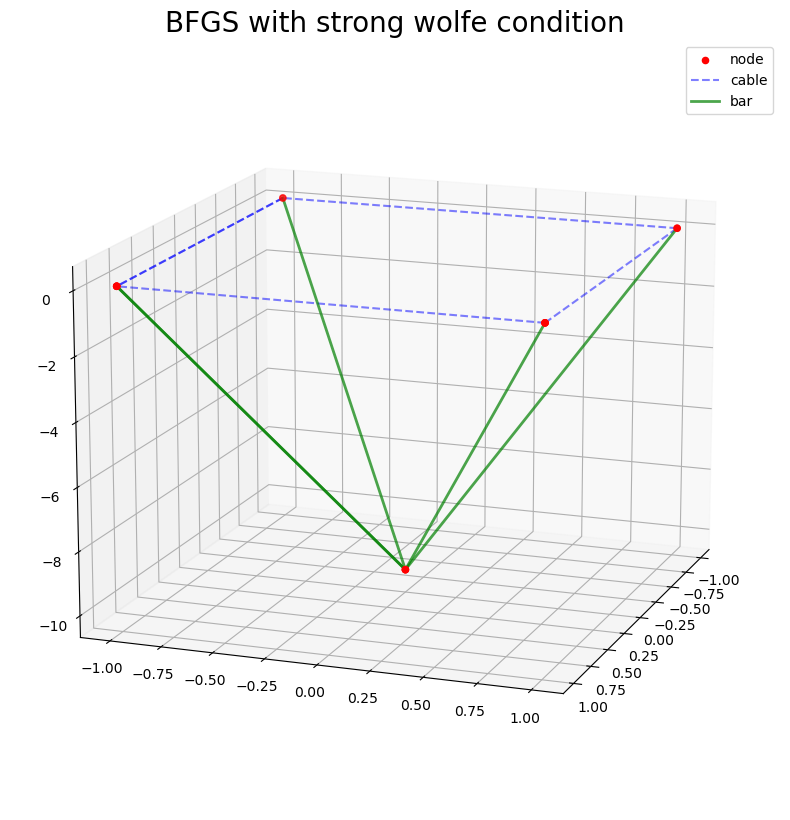

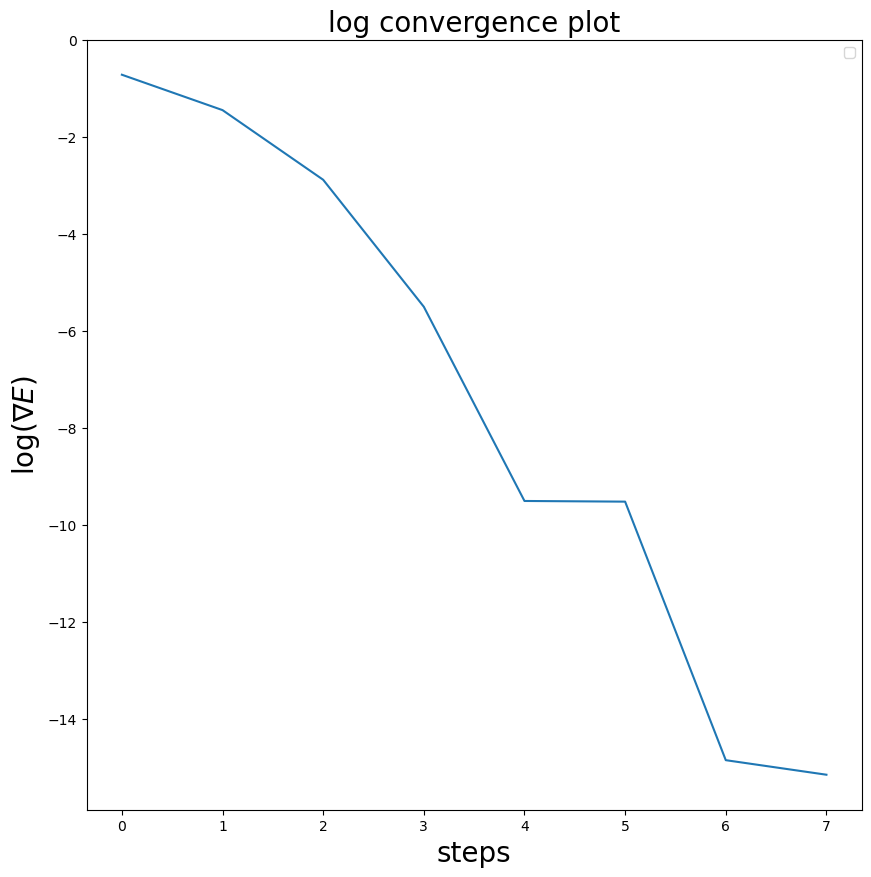

In [11]:
N = 5
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1

X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [0,0, -4]

cable_edges = np.array([[0,1], [1,2], [2,3], [0,3]])
bar_edges = np.array([[0,4], [1,4], [2,4], [3,4]])

create_edge(B, bar_edges)
create_edge(A, cable_edges)
fixed_points = [0,1,2,3]
L = 10*B + 10*A

mg, pg, k, c = 1e-4, 1e-4, 0.1, 1
fixed_points = [0,1,2,3]
X_BFGS, error_BFGS_alt_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, strong_w= True, tol = 1e-15)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition' , fontsize = 20)
ax1.view_init(15,20)
plt.legend()
plt.savefig('counter_example_p9_negative.png', bbox_inches = 'tight' )
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.legend()
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')

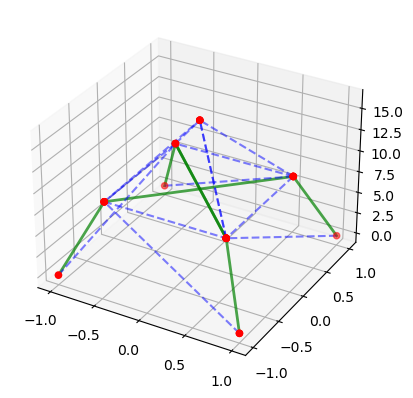

In [12]:
N = 9
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
L = np.ones((N,N))
a = 1
b = 2/3
c = 8
d = 1/2
e = 16
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  

X[:,8] = [0,0,e]


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]]) 
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7], [4, 6], [5,7]])
edges = np.array([[4,8],[5,8], [6,8], [7,8]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]

create_edge(L,cable_edges, 3)
create_edge(L,bar_edges, 2)
create_edge(A,edges, 0.5)
create_edge(L,edges, 0.5)

ax1 = plt.axes(projection = '3d')
plot_bar_net(X, B, ax1)
plot_cable_net(X, A, ax1)

number of BFGS steps = 29, number of step size optimization = 20, norm of gradient = 2.5063650875972074e-13, Energy = -1.8675871498239025
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00  5.71419e-01
  -5.83268e-01 -5.71419e-01  5.83268e-01  4.51463e-16]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00  5.83268e-01
   5.71419e-01 -5.83268e-01 -5.71419e-01  2.61128e-17]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00 -2.78018e+00
  -2.78018e+00 -2.78018e+00 -2.78018e+00 -3.03135e+00]]


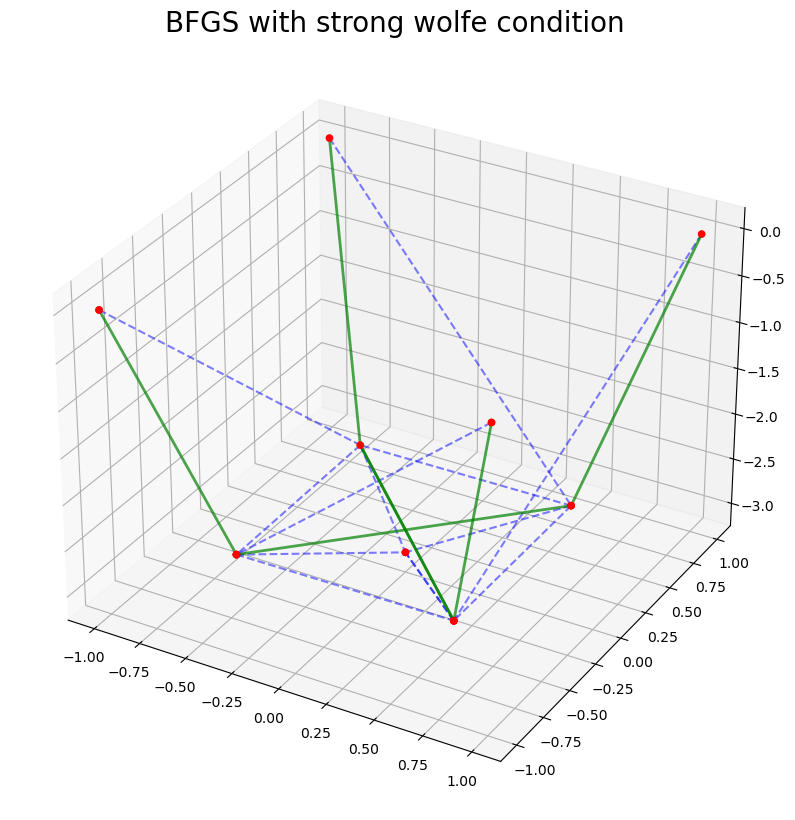

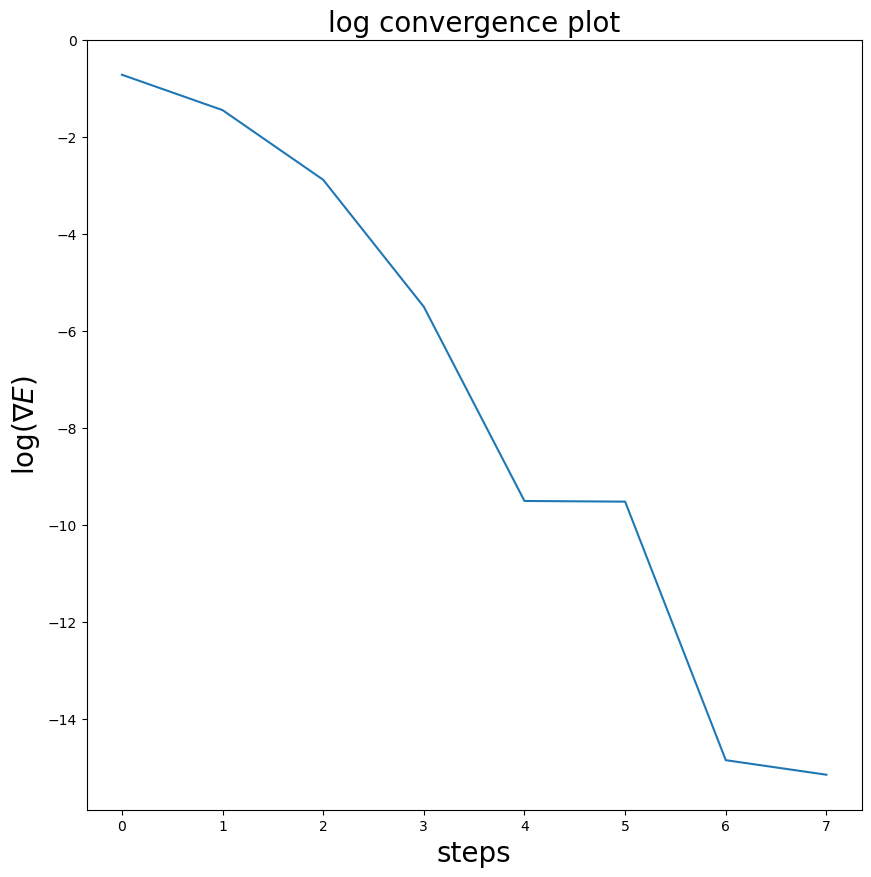

In [13]:
mg, pg, k, c = 1/6, 0, 0.1, 1
X_BFGS, error_BFGS = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-10, strong_w = True)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition' , fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')

### Part 3 Constrained optimization 

methods:
- Quadrative penalty method with BFGS as free optimization technique 

constraints:
- $x_i^3 \geq f(x_i^1, x_i^2)$

In [14]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
e = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,e]
X[:,5] = [-b,b,e]
X[:,6] = [-b,-b,e]
X[:,7] = [b,-b,e]  
#X[:,4:] = np.random.randint(-10, 10, size = (np.shape(X[:,4:])))

cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4],[0,1], [1,2], [2,3], [3,0]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges,1)
create_edge(B, bar_edges,1)
fixed_points = []
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)
edges = np.array([[0,1], [1,2], [2,3], [3,0]])
create_edge(L,edges, 2)

In [15]:
fixed_points = []
mg, pg, k, c = 1e-4, 1e-4, 0.1, 1
mu = 1
X_BFGS = np.copy(X)
for i in range(5):
    X_BFGS, error_BFGS_constrained = BFGS(quad_penalty, gradient_quad_penalty, np.copy(X_BFGS), A, B, L, fixed_points, mg, pg, k, c, mu, tol = 1e-8, strong_w= True)
    mu *= 10
print(np.sum(constraint(X_BFGS)**2))
print(X_BFGS)
print(mu)

number of BFGS steps = 39, number of step size optimization = 32, norm of gradient = 2.3017380145794708e-09, Energy = 0.03258907869811836
number of BFGS steps = 29, number of step size optimization = 34, norm of gradient = 6.881985405682139e-09, Energy = 0.03259167069811837
number of BFGS steps = 28, number of step size optimization = 35, norm of gradient = 5.317064652652106e-10, Energy = 0.03259192989811836
number of BFGS steps = 29, number of step size optimization = 154, norm of gradient = 1.302391495365825e-09, Energy = 0.03259195581811836
number of BFGS steps = 22, number of step size optimization = 62, norm of gradient = 9.412701396353679e-09, Energy = 0.032591958410118374
5.760030408692379e-14
[[ 0.83779 -1.14448 -0.83779  1.14448 -0.68556  0.18546  0.68556 -0.18546]
 [ 1.14448  0.83779 -1.14448 -0.83779 -0.18546 -0.68556  0.18546  0.68556]
 [ 0.10059  0.10059  0.10059  0.10059  9.58064  9.58064  9.58064  9.58064]]
100000


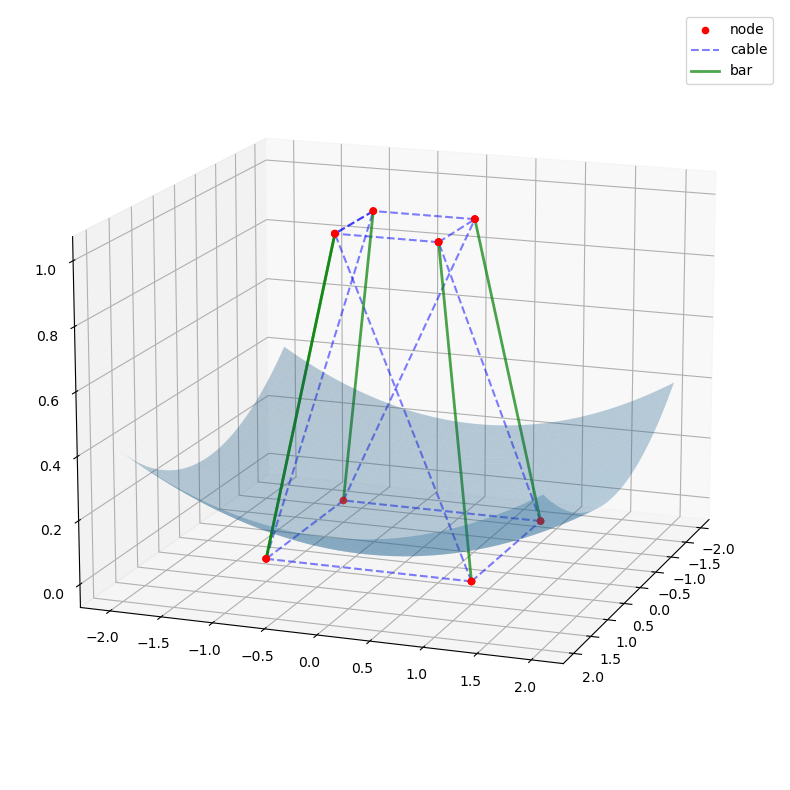

In [16]:
x = np.linspace(-2,2, 1000)
y = np.copy(x)
X1,Y1 = np.meshgrid(x,y)
z = (X1**2 + Y1**2)/20

plt.figure(figsize = (10,10))
ax0 = plt.axes(projection = '3d')
plot_cable_net(X, A, ax0)
plot_bar_net(X, B, ax0)
ax0.plot_surface(X1,Y1,z, alpha = 0.3)
#ax0.set_title('Inital state', fontsize = 20)
ax0.view_init(15,20)
plt.legend()
plt.savefig('inital_state_constrained.png', bbox_inches = 'tight')


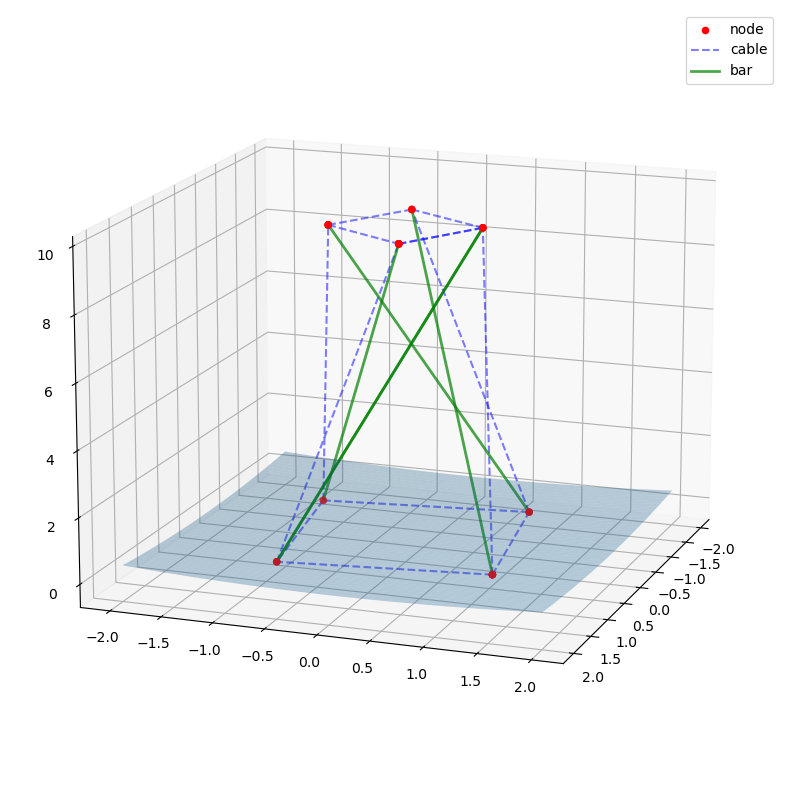

In [17]:
plt.figure(figsize = (10,10))
ax1 = plt.axes(projection = '3d')
ax1.plot_surface(X1,Y1,z, alpha = 0.3)
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1) 
#ax1.set_title(f'BFGS with strong wolfe conditions', fontsize = 20)
ax1.view_init(15,20)
plt.legend()
plt.savefig('BFGS_strong_wolfe_tensegrity_dome_constrained.png', bbox_inches = 'tight')



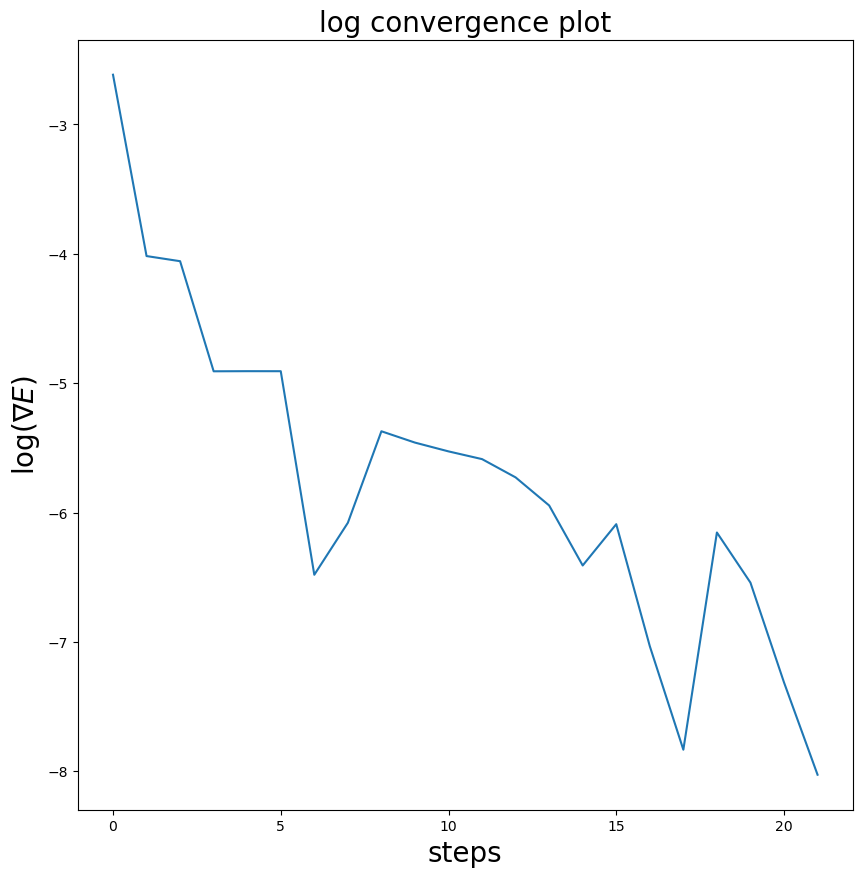

In [18]:
index = range(len(error_BFGS_constrained))

plt.figure(figsize = (10,10))
ax2 = plt.axes()
ax2.plot(index, np.log10(error_BFGS_constrained))
ax2.set_xlabel(f'steps', fontsize = 20)
ax2.set_ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
ax2.set_title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_strong_wolfe_constrained.png', bbox_inches = 'tight')


In [19]:
N = 12
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
L = np.ones((N,N))
a = 1
b = 1
c = 8
d = 1
e = 16
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  

X[:,8] = [d,d,e]
X[:,9] = [-d,d,e]
X[:,10] = [-d,-d,e]
X[:,11] = [d,-d,e]  


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4], [4,11], [5,8], [6,9], [7,10], [8,9], [9,10], [10,11], [8,11]]) 
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7], [4,8], [5,9],[6,10],[7,11]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = []

L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7], [8,9], [9,10], [10,11],[8,11] ])
create_edge(L,edges, 1)
edges = np.array([[0,1], [1,2], [2,3], [3,0], [4,5], [5,6], [6,7], [4,7]])
create_edge(L,edges, 2)
create_edge(A,edges, 2)

mg, pg, k, c, = 1e-4, 1e-4, 0.1, 1
mu = 1
X_BFGS = np.copy(X)
for i in range(5):
    X_BFGS, error_BFGS_constrained = BFGS(quad_penalty, gradient_quad_penalty, X_BFGS, A, B, L, fixed_points, mg, pg, k, c, mu, strong_w = True, tol = 1e-8)
    mu *= 10
print(np.sum(constraint(X_BFGS)**2))
print(X_BFGS)

number of BFGS steps = 89, number of step size optimization = 68, norm of gradient = 1.5572105010540467e-09, Energy = 0.10409036613764454
number of BFGS steps = 51, number of step size optimization = 35, norm of gradient = 4.031344087956885e-09, Energy = 0.10409988813764472
number of BFGS steps = 56, number of step size optimization = 40, norm of gradient = 7.426869493426777e-09, Energy = 0.10410084033764576
number of BFGS steps = 44, number of step size optimization = 56, norm of gradient = 7.288925555846046e-09, Energy = 0.10410093555764645
number of BFGS steps = 45, number of step size optimization = 166, norm of gradient = 7.85073929889442e-09, Energy = 0.10410094507964486
2.1160008085832642e-13
[[ 0.18642  1.41399 -0.18642 -1.41399  0.5173  -1.34417 -0.5173   1.34417
  -0.61321  0.35836  0.61321 -0.35836]
 [-1.41399  0.18642  1.41399 -0.18641  1.34417  0.5173  -1.34417 -0.5173
  -0.35836 -0.61321  0.35836  0.61321]
 [ 0.10171  0.10171  0.10171  0.10171  9.30177  9.30177  9.30177  

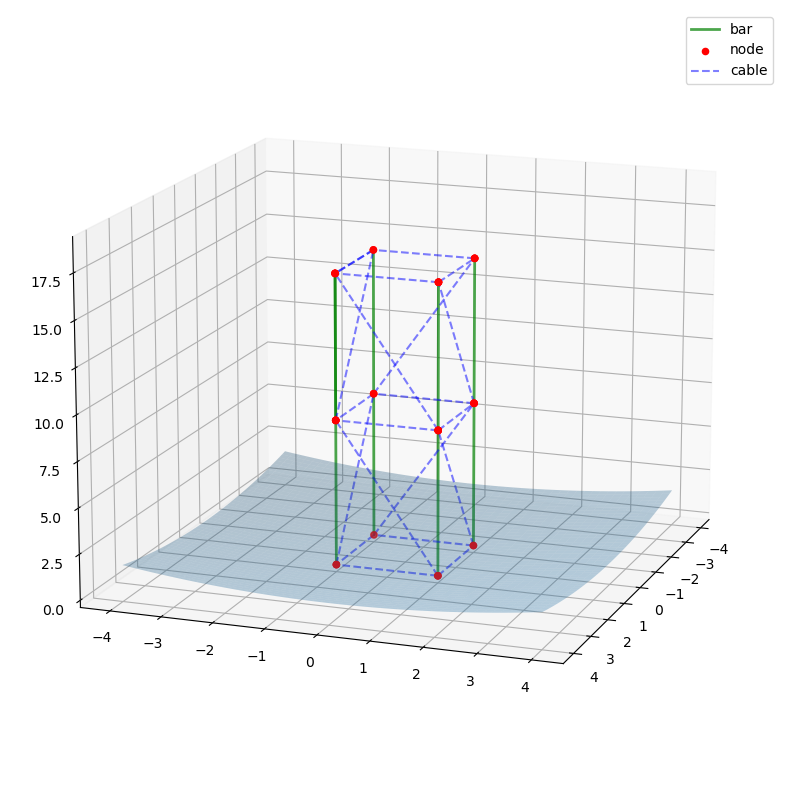

In [20]:
x = np.linspace(-4,4, 1000)
y = np.copy(x)
X1,Y1 = np.meshgrid(x,y)
z = (X1**2 + Y1**2)/20

plt.figure(figsize = (10,10))
ax1 = plt.axes(projection = '3d')
#ax1.set_title('Inital state', fontsize = 20)
plot_bar_net(X, B, ax1)
plot_cable_net(X, A, ax1)
ax1.plot_surface(X1,Y1,z, alpha = 0.3)
ax1.view_init(15,20)
ax1.set_zlim(0,19)
plt.legend()
plt.savefig('intial_staste_tensegrity_dome_two_level.png', bbox_inches = 'tight')



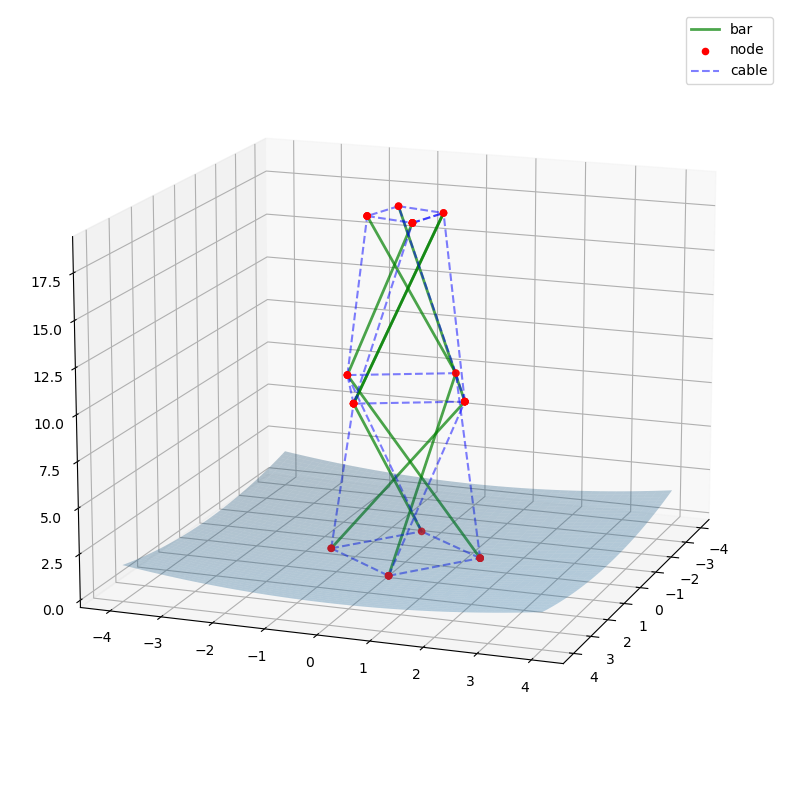

In [21]:
plt.figure(figsize = (10,10))
ax2 = plt.axes(projection = '3d')
#ax2.set_title('BFGS with strong Wolfe', fontsize = 20)
plot_bar_net(X_BFGS, B, ax2)
plot_cable_net(X_BFGS, A, ax2)
ax2.plot_surface(X1,Y1,z, alpha = 0.3)
ax2.view_init(15,20)
ax2.set_zlim(0,19)
plt.legend()
plt.savefig('BFGS_strong_wolfe_constrained_two_level.png', bbox_inches = 'tight')

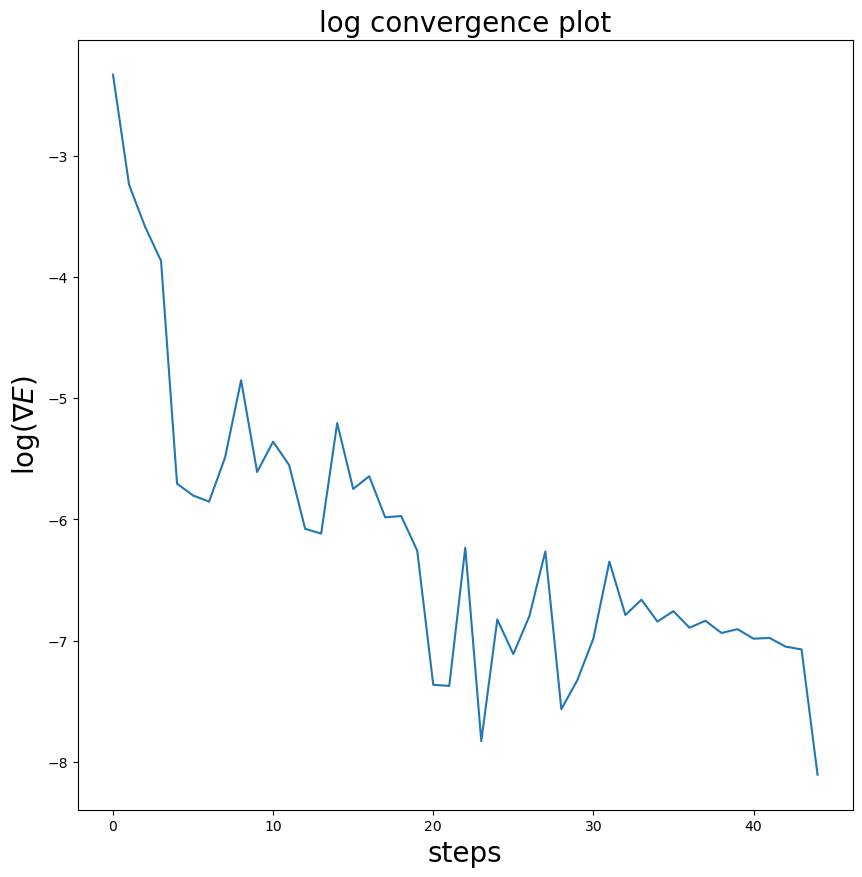

In [22]:

index = range(len(error_BFGS_constrained))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_constrained))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_strong_wolfe_constrained_two_level.png', bbox_inches = 'tight')
plt.show()